In [64]:
#reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tmp_data = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",
                    match="Коефіцієнт народжуваності в регіонах України")
data = tmp_data[0]

In [65]:
#first rows
print(data.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [66]:
#shape
print(data.shape)

(28, 9)


In [67]:
#replacing '-' with NaN
data = data.replace('—', np.nan)
print(data.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


In [68]:
#data types
print(data.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [69]:
#changing types to numeric
data = data.apply(pd.to_numeric, errors='ignore')
print(data.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


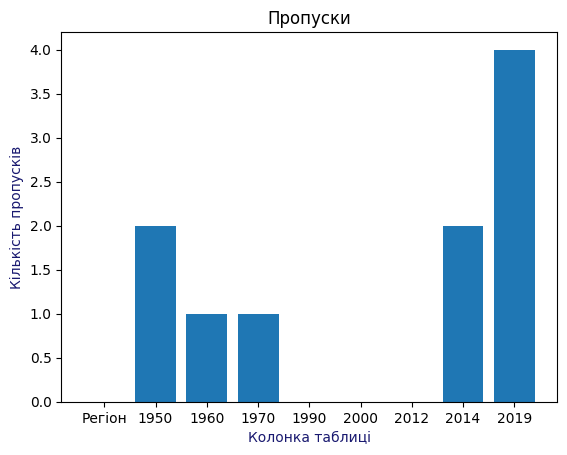

In [70]:
#counting NaNs
nulls_numbers = data.isna().sum()
print(nulls_numbers)
plt.bar(data.columns, nulls_numbers)
plt.title("Пропуски")
plt.xlabel("Колонка таблиці", color='midnightblue')
plt.ylabel("Кількість пропусків", color='midnightblue')
plt.show()

In [71]:
#dropping the last row
data = data.drop([27])
print(data.tail)

<bound method NDFrame.tail of                Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0   

In [72]:
#filling NaNs
numerics = data.columns[1:]
means = data[numerics].mean()
data[numerics] = data[numerics].fillna(means)
print(data.head())


             Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0              Крим  230.0  206.0  160.0   130    73   126  111.44   80.173913
1         Вінницька  224.0  192.0  142.0   124    84   112  109.00   76.000000
2         Волинська  247.0  250.0  179.0   153   112   148  141.00  101.000000
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.00   71.000000
4          Донецька  271.0  214.0  140.0   109    61    98   82.00   80.173913


               Регіон   2019
2           Волинська  101.0
6        Закарпатська  104.0
8   Івано-Франківська   88.0
12          Львівська   87.0
14            Одеська   88.0
16         Рівненська  107.0
20         Херсонська   81.0
23        Чернівецька   92.0
25               Київ  110.0


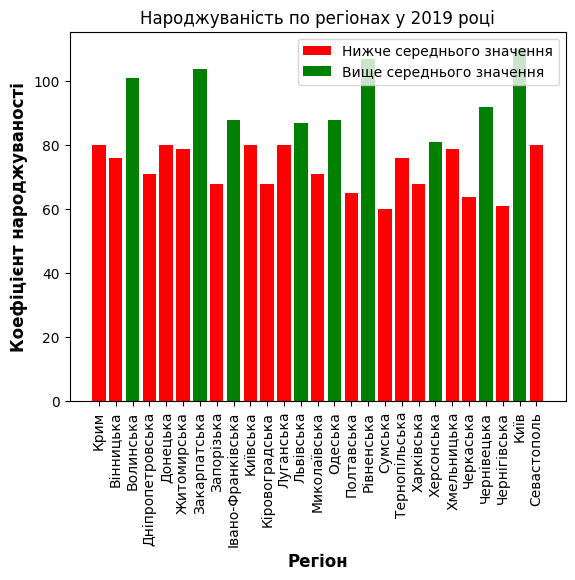

In [85]:
#higher then average in 2019
mean = data["2019"].mean()
regions = data[data["2019"]>mean][["Регіон", "2019"]]
print(regions)
plt.bar(data["Регіон"], data['2019'], color='red', label="Нижче середнього значення")
plt.bar(regions["Регіон"], regions['2019'], color='green', label="Вище середнього значення")
plt.xticks(rotation=90)
plt.xlabel("Регіон", fontweight="demi", fontsize="large")
plt.ylabel("Коефіцієнт народжуваності", fontweight="demi", fontsize="large")
plt.title("Народжуваність по регіонах у 2019 році")
plt.legend()
plt.show()

In [74]:
#maximum in 2014
r_max = data["2014"].max()
region = data[data["2014"]==r_max]["Регіон"].tolist()[0]
print(region)

Рівненська


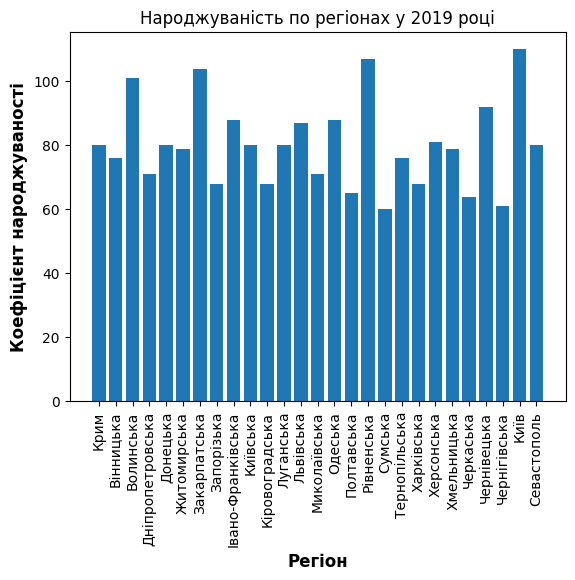

In [75]:
#plotting 2019
plt.bar(data["Регіон"], data["2019"])
plt.xlabel("Регіон", fontweight="demi", fontsize="large")
plt.ylabel("Коефіцієнт народжуваності", fontweight="demi", fontsize="large")
plt.title("Народжуваність по регіонах у 2019 році")
plt.xticks(rotation=90)
plt.show()